In [10]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install pmdarima
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Data and decomposition

In [11]:
df = pd.read_csv("/kaggle/input/crude-oil-price/crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646,1.36
2,1983-05-02T00:00:00,30.25,-1.241,-0.38
3,1983-06-01T00:00:00,31.38,3.736,1.13
4,1983-07-01T00:00:00,32.00,1.976,0.62


In [12]:
df.tail()

,date,price,percentChange,change
479,2023-02-01T00:00:00,77.1900,-2.501,-1.9800
480,2023-03-01T00:00:00,75.8000,-1.801,-1.3900
481,2023-04-03T00:00:00,76.7800,1.293,0.9800
482,2023-05-01T00:00:00,68.0900,-11.318,-8.6900
483,2023-06-01T00:00:00,67.7637,-0.479,-0.3263


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           484 non-null    object 
 1   price          484 non-null    float64
 2   percentChange  483 non-null    float64
 3   change         483 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


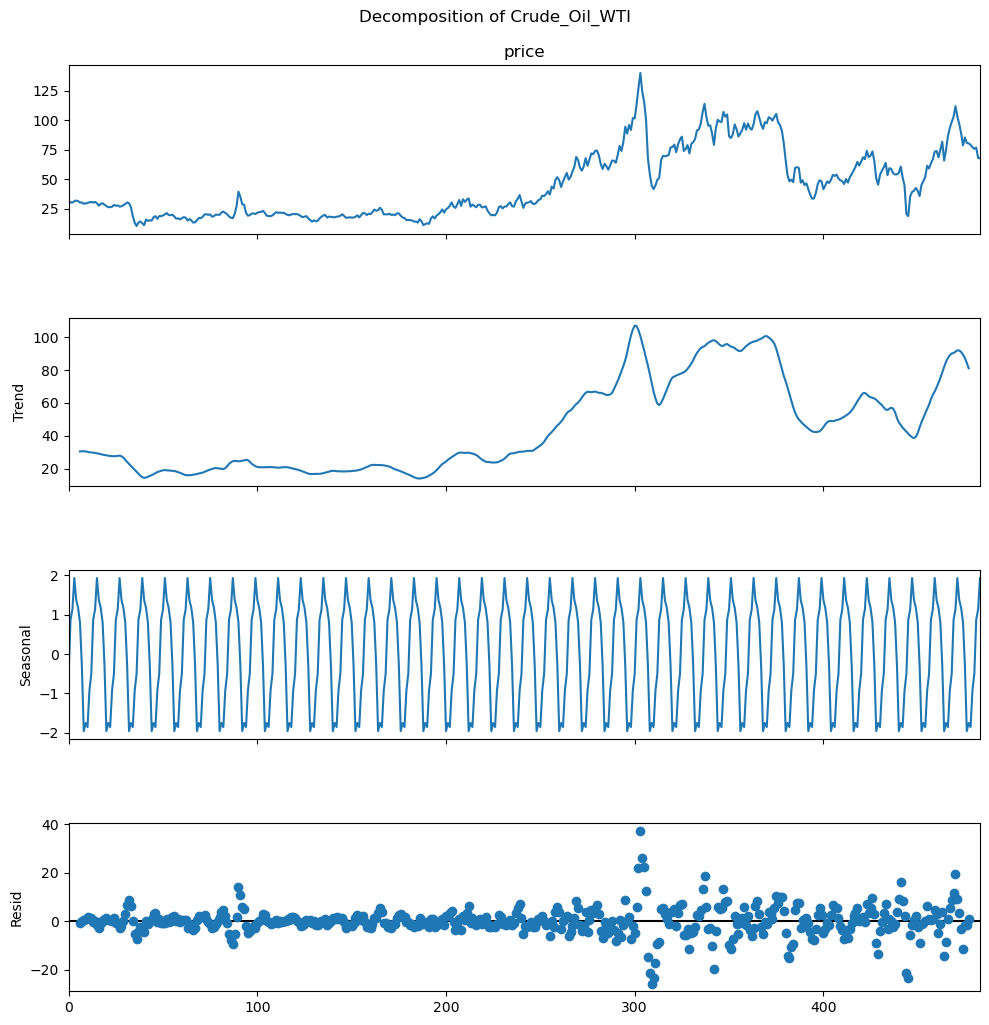

In [14]:
# Decompose the price
decomp_results_gold = seasonal_decompose(df['price'], period=12)


# Plot decomposed data 
plt.rcParams["figure.figsize"] = (10,10)
fig = decomp_results_gold.plot()
plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots
plt.suptitle('Decomposition of Crude_Oil_WTI', y=1.02)  # Adjust the main title position
plt.show()

The decomposition of WTI Crude Oil prices from 1983 onwards reveals the following characteristics:

- Weaker Upward Trend: The decomposition analysis indicates that WTI Crude Oil prices exhibit a relatively weaker upward trend over the analyzed period. This suggests that while there is a general tendency for prices to increase over time, the magnitude of this upward trend is not very strong.

- Additive Seasonality: The decomposition analysis also reveals that WTI Crude Oil prices display additive seasonality. This means that the fluctuations in prices follow a consistent pattern throughout the observed period, with a constant magnitude of variation.

Overall, based on the presence of a weaker upward trend and additive seasonality, it can be concluded that WTI Crude Oil prices are non-stationary. This implies that the prices are influenced by underlying factors that lead to long-term trends and predictable seasonal patterns, making them less likely to revert to a stationary state.

## Augmented Dickey-Fuller (ADF) Test

The ADF test is a unit root test used to determine whether a time series is stationary or non-stationary. A unit root refers to a situation where a time series behaves similarly to a random walk, exhibiting non-stationary behavior. Non-stationary series are unpredictable, with irregular shifts and changes that lack a specific pattern.

In the ADF test, the null hypothesis assumes the presence of a unit root, indicating that the series is non-stationary. If the calculated p-value from the test is below the chosen significance level (typically 0.05), the null hypothesis is rejected, indicating that the time series is stationary.

To perform the ADF test in Python, you can utilize the adfuller function from the statsmodels library. This function provides a straightforward implementation for conducting the ADF test and evaluating the stationarity of a time series.

In [15]:
print("adfuller test results shown below")
result = sm.tsa.adfuller(df['price'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] < 0.05:
    print("Null hypothesis that data is non-stationary is rejected. Thus, data is stationary (p_value < 0.05)")
else:
    print("Null hypothesis that data is non-stationary is accepted. Thus, data is non-stationary (p_value > 0.05)")

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

adfuller test results shown below
(-2.3043423656197217, 0.1705712968007443, 1, 482, {'1%': -3.4439899743408136, '5%': -2.8675550551408353, '10%': -2.569973792117904}, 2803.194411553148)
ADF Statistic: -2.304342
p-value: 0.170571
Null hypothesis that data is non-stationary is accepted. Thus, data is non-stationary (p_value > 0.05)
	1%: -3.444
	5%: -2.868
	10%: -2.570


## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test


The KPSS test is different from the ADF test in that it focuses on determining whether a time series is stationary around a deterministic trend, rather than being non-stationary due to a unit root. This distinction is important because a time series can exhibit non-stationarity in different ways. It could be stationary around a deterministic trend, where fluctuations around the trend consistently revert to the trend and the variations remain relatively stable. This form of non-stationarity is distinct from having a unit root.

In the KPSS test, the null hypothesis is that the time series data is stationary or trend stationary. If the test statistic exceeds the critical value, we reject the null hypothesis, indicating that the series is not stationary.

In [16]:
def kpss_test(data):
    series = data['price']
    statistic, p_value, n_lags, critical_values = kpss(series)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Number of Lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
    if p_value < 0.05:
        print("Result: The series is not stationary.")
        print("Null hypothesis that data is stationary is rejected. Thus, data is non-stationary (p_value < 0.01)")
    else:
        print("Result: The series is stationary.")
        print("Null hypothesis that data is stationary is accepted. Thus, data is stationary (p_value > 0.01)")

kpss_test(df)

KPSS Statistic: 2.431121120227153
p-value: 0.01
Number of Lags: 12
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary.
Null hypothesis that data is stationary is rejected. Thus, data is non-stationary (p_value < 0.01)


## Autocorrelation and Partial Autocorrelation plot

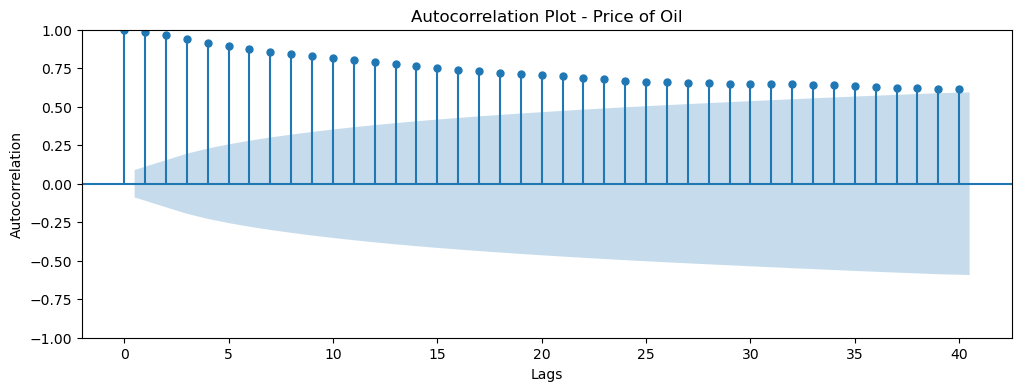

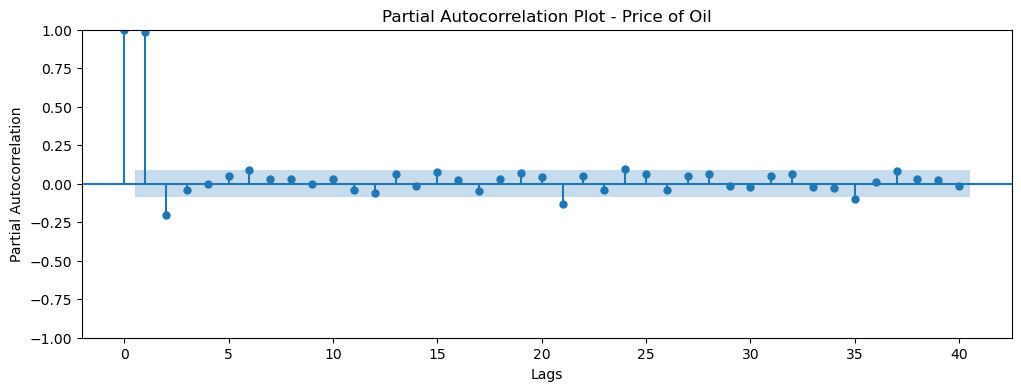

In [17]:
# Generate autocorrelation plot
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(df['price'], lags=40, ax=ax)
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Plot - Price of Oil')
plt.show()

# Generate partial autocorrelation plot
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(df['price'], lags=40, ax=ax)
ax.set_xlabel('Lags')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Plot - Price of Oil')
plt.show()

## Plotting ACF and PACF

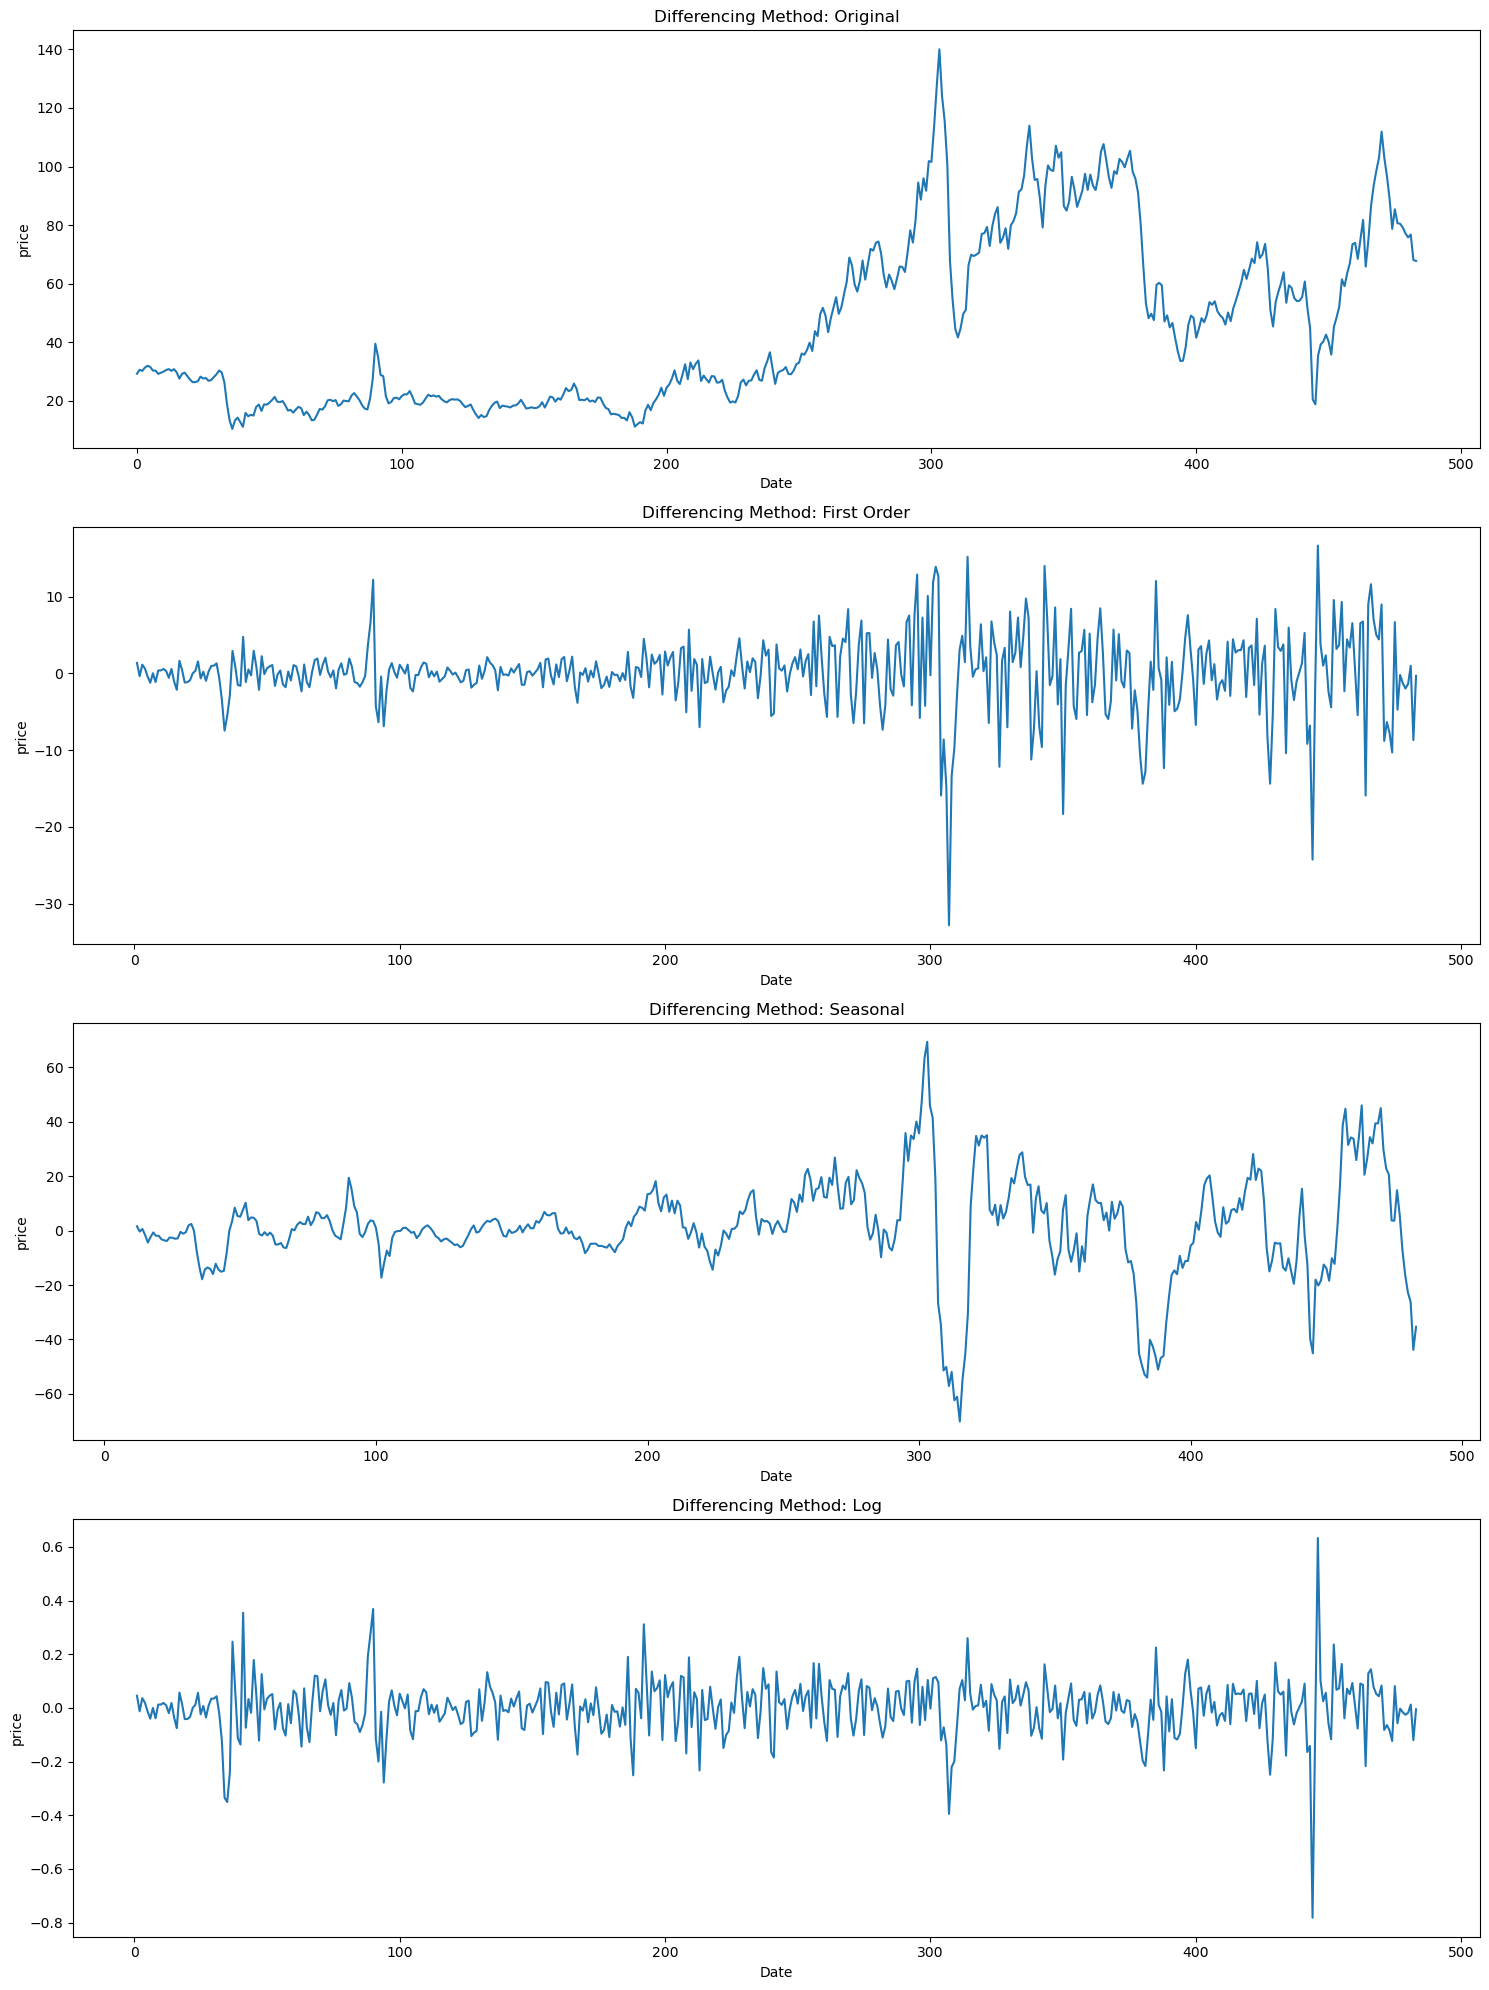


##### Original Differencing #####
ADF Statistic: -2.304342
p-value: 0.170571
ADF Test: The series appears to be non-stationary
KPSS Statistic: 2.431121120227153
p-value: 0.01
num lags: 12
KPSS Test: The series appears to be non-stationary
Original Differencing - Optimal ARMA(p,q): (1, 1, 0)

##### First Order Differencing #####
ADF Statistic: -17.727852
p-value: 0.000000
ADF Test: The series appears to be stationary
KPSS Statistic: 0.03198919555410495
p-value: 0.1
num lags: 5
KPSS Test: The series appears to be stationary
First Order Differencing - Optimal ARMA(p,q): (1, 0, 0)

##### Seasonal Differencing #####
ADF Statistic: -5.105057
p-value: 0.000014
ADF Test: The series appears to be stationary
KPSS Statistic: 0.0687521024201071
p-value: 0.1
num lags: 12
KPSS Test: The series appears to be stationary
Seasonal Differencing - Optimal ARMA(p,q): (2, 0, 1)

##### Log Differencing #####
ADF Statistic: -12.186056
p-value: 0.000000
ADF Test: The series appears to be stationary
KPSS Stati

In [18]:
def apply_differencing(df, column='value', seasonality=None):
    """
    Apply different differencing methods on the given DataFrame.


    Parameters:
        - df: Pandas DataFrame
            The input DataFrame containing the time series data.
        - column: str, optional (default='value')
            The name of the column to analyze.
        - seasonality: int, optional (default=None)
            The seasonality period for seasonal differencing.


    Returns:
        - differencing_results: dict
            A dictionary containing the differencing methods and their results.


    """

    differencing_results = {}

    # Convert the column to numeric type
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Original data
    differencing_results['Original'] = df[column]

    # First-order differencing
    differencing_results['First Order'] = df[column].diff().dropna()

    # Seasonal differencing
    if seasonality is not None:
        differencing_results['Seasonal'] = df[column].diff(periods=seasonality).dropna()

    # Logarithmic differencing
    differencing_results['Log'] = np.log(df[column]).diff().dropna()

    # Plot differencing results
    fig, axes = plt.subplots(len(differencing_results), 1, figsize=(15, 5 * len(differencing_results)))
    for i, (method, series) in enumerate(differencing_results.items()):
        axes[i].plot(series)
        axes[i].set_ylabel(column)
        axes[i].set_xlabel('Date')
        axes[i].set_title(f'Differencing Method: {method}')
    plt.tight_layout()
    plt.show()

    # Perform ADF and KPSS tests
    for method, series in differencing_results.items():
        print(f'\n##### {method} Differencing #####')
        perform_adf_test(series)
        perform_kpss_test(series)
        find_optimal_arma(series, method)

    return differencing_results


def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("ADF Test: The series appears to be stationary")
    else:
        print("ADF Test: The series appears to be non-stationary")


def perform_kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    if p_value < 0.05:
        print("KPSS Test: The series appears to be non-stationary")
    else:
        print("KPSS Test: The series appears to be stationary")


def find_optimal_arma(series, method):
    stepwise_model = auto_arima(series, start_p=0, start_q=0,
                               max_p=3, max_q=3, m=1,
                               seasonal=False,
                               suppress_warnings=True,
                               trace=False,
                               error_action='ignore',
                               stepwise=True)
    best_order = stepwise_model.order
    print(f'{method} Differencing - Optimal ARMA(p,q): {best_order}')


# Apply differencing methods
differencing_results = apply_differencing(df, column='price', seasonality=12)

## Statistical methods: ARIMA

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import ParameterSampler
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')  # Ignore warning messages


# Load and preprocess the data
df = pd.read_csv("/kaggle/input/crude-oil-price/crude-oil-price.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

# Split data into train and test
train_size = int(len(df) * 0.8)  # Use 80% of data for training
train, test = df[0:train_size], df[train_size:len(df)]

# Define the range of parameters
param_grid = {"order": [(p, d, q) for p in range(2) for d in [0, 1] for q in range(2)]}
param_list = list(ParameterGrid(param_grid))

best_aic = np.inf
best_params = None

# Train the model on the training set
for params in param_list:
    model = ARIMA(train['price'], order=params['order'])
    model_fit = model.fit()

    # Save AIC score
    aic = model_fit.aic

    # Update best parameters if current model has a lower AIC
    if aic < best_aic:
        best_aic = aic
        best_params = params

print('Best parameters:', best_params)
print('Best AIC:', best_aic)

# Fit the best model on the entire dataset (train + test)
best_model = ARIMA(df['price'], order=best_params['order'])
best_model_fit = best_model.fit()

# Create forecast object
forecast = best_model_fit.get_forecast(steps=18)

# Extract prediction mean
mean = forecast.predicted_mean

Best parameters: {'order': (1, 1, 0)}
Best AIC: 2245.388488004867


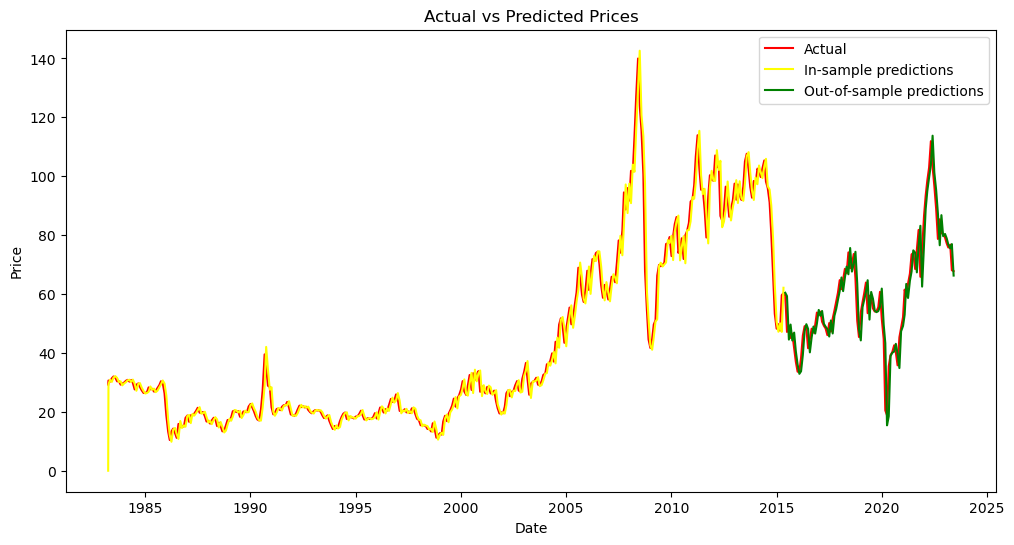

In [40]:
# Get in-sample predictions
in_sample_preds = best_model_fit.predict(start=train.index.min(), end=train.index.max())

# Get out-of-sample predictions
out_of_sample_preds = best_model_fit.predict(start=test.index.min(), end=test.index.max())

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(df['price'], color='red', label='Actual')
plt.plot(in_sample_preds, color='yellow', label='In-sample predictions')
plt.plot(out_of_sample_preds, color='g', label='Out-of-sample predictions')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Prophet

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterSampler
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import matplotlib.pyplot as plt
from scipy.stats import uniform


df = pd.read_csv("/kaggle/input/crude-oil-price/crude-oil-price.csv")
# Reset index to have Date as a column
df.reset_index(inplace=True)

# Make 'price' stationary
df['price_diff'] = df['price'].diff()
df.dropna(inplace=True)

# Create a scaler for 'price'
price_scaler = MinMaxScaler()
df['price_diff_scaled'] = price_scaler.fit_transform(df[['price_diff']])

# Prepare dataframe for Prophet
df_prophet = pd.DataFrame({
    'ds': df['date'],
    'y': df['price_diff_scaled'].values
})

# Define the parameter space
param_space = {
    'changepoint_prior_scale': uniform(0.01, 0.5),
    'seasonality_prior_scale': uniform(0.1, 10.0),
    'changepoint_range': uniform(0.8, 0.1),
    'seasonality_mode': ['additive', 'multiplicative'],
    'daily_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'yearly_seasonality': [True, False]
}

# Define number of iterations for random search
n_iter = 50

# Perform random search
tuning_results = []
for params in ParameterSampler(param_space, n_iter=n_iter):
    model = Prophet(**params)
    model.fit(df_prophet)
    
    # Perform cross-validation
    cv_results = cross_validation(model, initial='3650 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(cv_results)

    metrics = {}
    try:
        metrics['mape'] = df_p['mape'].mean()
    except KeyError:
        pass

    try:
        metrics['mae'] = df_p['mae'].mean()
    except KeyError:
        pass

    try:
        metrics['rmse'] = df_p['rmse'].mean()
    except KeyError:
        pass

    tuning_results.append({
        'params': params,
        'metrics': metrics,
    })

# Find the best parameters
best_params = min(tuning_results, key=lambda x: x['metrics'].get('mape', float('inf')))['params']

# Print the best parameters
print('Best Parameters:')
print(best_params)

# Use best parameters to predict future values
model = Prophet(**best_params)
model.fit(df_prophet)

# Predict
forecast = model.predict()

# Denormalize 'yhat'
forecast['yhat'] = price_scaler.inverse_transform(forecast[['yhat']])
forecast['yhat_lower'] = price_scaler.inverse_transform(forecast[['yhat_lower']])
forecast['yhat_upper'] = price_scaler.inverse_transform(forecast[['yhat_upper']])

# Undifference the predictions
last_value = df.iloc[-1]['price']
forecast['yhat'] = np.r_[last_value, forecast['yhat'].values].cumsum()[1:]
forecast['yhat_lower'] = np.r_[last_value, forecast['yhat_lower'].values].cumsum()[1:]
forecast['yhat_upper'] = np.r_[last_value, forecast['yhat_upper'].values].cumsum()[1:]

# Print predicted prices
print("Predicted Prices:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


17:47:34 - cmdstanpy - INFO - Chain [1] start processing
17:47:35 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/60 [00:00<?, ?it/s]

17:47:35 - cmdstanpy - INFO - Chain [1] start processing
17:47:35 - cmdstanpy - INFO - Chain [1] done processing
17:47:35 - cmdstanpy - INFO - Chain [1] start processing
17:47:35 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing
17:47:36 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing
17:47:36 - cmdstanpy - INFO - Chain [1] done processing
17:47:36 - cmdstanpy - INFO - Chain [1] start processing
17:47:36 - cmdstanpy - INFO - Chain [1] done processing
17:47:37 - cmdstanpy - INFO - Chain [1] start processing
17:47:37 - cmdstanpy - INFO - Chain [1] done processing
17:47:37 - cmdstanpy - INFO - Chain [1] start processing
17:47:37 - cmdstanpy - INFO - Chain [1] done processing
17:47:38 - cmdstanpy - INFO - Chain [1] start processing
17:47:38 - cmdstanpy - INFO - Chain [1] done processing
17:47:38 - cmdstanpy - INFO - Chain [1] start processing
17:47:38 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:48:05 - cmdstanpy - INFO - Chain [1] start processing
17:48:05 - cmdstanpy - INFO - Chain [1] done processing
17:48:05 - cmdstanpy - INFO - Chain [1] start processing
17:48:05 - cmdstanpy - INFO - Chain [1] done processing
17:48:06 - cmdstanpy - INFO - Chain [1] start processing
17:48:06 - cmdstanpy - INFO - Chain [1] done processing
17:48:06 - cmdstanpy - INFO - Chain [1] start processing
17:48:06 - cmdstanpy - INFO - Chain [1] done processing
17:48:06 - cmdstanpy - INFO - Chain [1] start processing
17:48:07 - cmdstanpy - INFO - Chain [1] done processing
17:48:07 - cmdstanpy - INFO - Chain [1] start processing
17:48:07 - cmdstanpy - INFO - Chain [1] done processing
17:48:07 - cmdstanpy - INFO - Chain [1] start processing
17:48:07 - cmdstanpy - INFO - Chain [1] done processing
17:48:08 - cmdstanpy - INFO - Chain [1] start processing
17:48:08 - cmdstanpy - INFO - Chain [1] done processing
17:48:08 - cmdstanpy - INFO - Chain [1] start processing
17:48:08 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:48:33 - cmdstanpy - INFO - Chain [1] start processing
17:48:33 - cmdstanpy - INFO - Chain [1] done processing
17:48:33 - cmdstanpy - INFO - Chain [1] start processing
17:48:33 - cmdstanpy - INFO - Chain [1] done processing
17:48:34 - cmdstanpy - INFO - Chain [1] start processing
17:48:34 - cmdstanpy - INFO - Chain [1] done processing
17:48:34 - cmdstanpy - INFO - Chain [1] start processing
17:48:34 - cmdstanpy - INFO - Chain [1] done processing
17:48:35 - cmdstanpy - INFO - Chain [1] start processing
17:48:35 - cmdstanpy - INFO - Chain [1] done processing
17:48:35 - cmdstanpy - INFO - Chain [1] start processing
17:48:35 - cmdstanpy - INFO - Chain [1] done processing
17:48:36 - cmdstanpy - INFO - Chain [1] start processing
17:48:36 - cmdstanpy - INFO - Chain [1] done processing
17:48:36 - cmdstanpy - INFO - Chain [1] start processing
17:48:36 - cmdstanpy - INFO - Chain [1] done processing
17:48:36 - cmdstanpy - INFO - Chain [1] start processing
17:48:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:49:02 - cmdstanpy - INFO - Chain [1] start processing
17:49:02 - cmdstanpy - INFO - Chain [1] done processing
17:49:02 - cmdstanpy - INFO - Chain [1] start processing
17:49:02 - cmdstanpy - INFO - Chain [1] done processing
17:49:03 - cmdstanpy - INFO - Chain [1] start processing
17:49:03 - cmdstanpy - INFO - Chain [1] done processing
17:49:03 - cmdstanpy - INFO - Chain [1] start processing
17:49:03 - cmdstanpy - INFO - Chain [1] done processing
17:49:04 - cmdstanpy - INFO - Chain [1] start processing
17:49:04 - cmdstanpy - INFO - Chain [1] done processing
17:49:04 - cmdstanpy - INFO - Chain [1] start processing
17:49:04 - cmdstanpy - INFO - Chain [1] done processing
17:49:04 - cmdstanpy - INFO - Chain [1] start processing
17:49:05 - cmdstanpy - INFO - Chain [1] done processing
17:49:05 - cmdstanpy - INFO - Chain [1] start processing
17:49:05 - cmdstanpy - INFO - Chain [1] done processing
17:49:05 - cmdstanpy - INFO - Chain [1] start processing
17:49:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:49:30 - cmdstanpy - INFO - Chain [1] start processing
17:49:30 - cmdstanpy - INFO - Chain [1] done processing
17:49:30 - cmdstanpy - INFO - Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:31 - cmdstanpy - INFO - Chain [1] start processing
17:49:31 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:32 - cmdstanpy - INFO - Chain [1] start processing
17:49:32 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1] done processing
17:49:33 - cmdstanpy - INFO - Chain [1] start processing
17:49:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:49:58 - cmdstanpy - INFO - Chain [1] start processing
17:49:58 - cmdstanpy - INFO - Chain [1] done processing
17:49:59 - cmdstanpy - INFO - Chain [1] start processing
17:49:59 - cmdstanpy - INFO - Chain [1] done processing
17:49:59 - cmdstanpy - INFO - Chain [1] start processing
17:49:59 - cmdstanpy - INFO - Chain [1] done processing
17:50:00 - cmdstanpy - INFO - Chain [1] start processing
17:50:00 - cmdstanpy - INFO - Chain [1] done processing
17:50:00 - cmdstanpy - INFO - Chain [1] start processing
17:50:00 - cmdstanpy - INFO - Chain [1] done processing
17:50:01 - cmdstanpy - INFO - Chain [1] start processing
17:50:01 - cmdstanpy - INFO - Chain [1] done processing
17:50:01 - cmdstanpy - INFO - Chain [1] start processing
17:50:01 - cmdstanpy - INFO - Chain [1] done processing
17:50:02 - cmdstanpy - INFO - Chain [1] start processing
17:50:02 - cmdstanpy - INFO - Chain [1] done processing
17:50:02 - cmdstanpy - INFO - Chain [1] start processing
17:50:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:50:29 - cmdstanpy - INFO - Chain [1] start processing
17:50:29 - cmdstanpy - INFO - Chain [1] done processing
17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
17:50:30 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:31 - cmdstanpy - INFO - Chain [1] start processing
17:50:31 - cmdstanpy - INFO - Chain [1] done processing
17:50:32 - cmdstanpy - INFO - Chain [1] start processing
17:50:32 - cmdstanpy - INFO - Chain [1] done processing
17:50:32 - cmdstanpy - INFO - Chain [1] start processing
17:50:32 - cmdstanpy - INFO - Chain [1] done processing
17:50:33 - cmdstanpy - INFO - Chain [1] start processing
17:50:33 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:50:58 - cmdstanpy - INFO - Chain [1] start processing
17:50:58 - cmdstanpy - INFO - Chain [1] done processing
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
17:50:59 - cmdstanpy - INFO - Chain [1] done processing
17:50:59 - cmdstanpy - INFO - Chain [1] start processing
17:50:59 - cmdstanpy - INFO - Chain [1] done processing
17:51:00 - cmdstanpy - INFO - Chain [1] start processing
17:51:00 - cmdstanpy - INFO - Chain [1] done processing
17:51:00 - cmdstanpy - INFO - Chain [1] start processing
17:51:00 - cmdstanpy - INFO - Chain [1] done processing
17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:01 - cmdstanpy - INFO - Chain [1] done processing
17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:01 - cmdstanpy - INFO - Chain [1] done processing
17:51:01 - cmdstanpy - INFO - Chain [1] start processing
17:51:01 - cmdstanpy - INFO - Chain [1] done processing
17:51:02 - cmdstanpy - INFO - Chain [1] start processing
17:51:02 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:51:27 - cmdstanpy - INFO - Chain [1] start processing
17:51:27 - cmdstanpy - INFO - Chain [1] done processing
17:51:27 - cmdstanpy - INFO - Chain [1] start processing
17:51:27 - cmdstanpy - INFO - Chain [1] done processing
17:51:28 - cmdstanpy - INFO - Chain [1] start processing
17:51:28 - cmdstanpy - INFO - Chain [1] done processing
17:51:28 - cmdstanpy - INFO - Chain [1] start processing
17:51:28 - cmdstanpy - INFO - Chain [1] done processing
17:51:29 - cmdstanpy - INFO - Chain [1] start processing
17:51:29 - cmdstanpy - INFO - Chain [1] done processing
17:51:29 - cmdstanpy - INFO - Chain [1] start processing
17:51:29 - cmdstanpy - INFO - Chain [1] done processing
17:51:29 - cmdstanpy - INFO - Chain [1] start processing
17:51:29 - cmdstanpy - INFO - Chain [1] done processing
17:51:30 - cmdstanpy - INFO - Chain [1] start processing
17:51:30 - cmdstanpy - INFO - Chain [1] done processing
17:51:30 - cmdstanpy - INFO - Chain [1] start processing
17:51:30 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:51:57 - cmdstanpy - INFO - Chain [1] start processing
17:51:57 - cmdstanpy - INFO - Chain [1] done processing
17:51:58 - cmdstanpy - INFO - Chain [1] start processing
17:51:58 - cmdstanpy - INFO - Chain [1] done processing
17:51:58 - cmdstanpy - INFO - Chain [1] start processing
17:51:58 - cmdstanpy - INFO - Chain [1] done processing
17:51:58 - cmdstanpy - INFO - Chain [1] start processing
17:51:58 - cmdstanpy - INFO - Chain [1] done processing
17:51:59 - cmdstanpy - INFO - Chain [1] start processing
17:51:59 - cmdstanpy - INFO - Chain [1] done processing
17:51:59 - cmdstanpy - INFO - Chain [1] start processing
17:51:59 - cmdstanpy - INFO - Chain [1] done processing
17:52:00 - cmdstanpy - INFO - Chain [1] start processing
17:52:00 - cmdstanpy - INFO - Chain [1] done processing
17:52:01 - cmdstanpy - INFO - Chain [1] start processing
17:52:01 - cmdstanpy - INFO - Chain [1] done processing
17:52:01 - cmdstanpy - INFO - Chain [1] start processing
17:52:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:52:25 - cmdstanpy - INFO - Chain [1] start processing
17:52:25 - cmdstanpy - INFO - Chain [1] done processing
17:52:26 - cmdstanpy - INFO - Chain [1] start processing
17:52:26 - cmdstanpy - INFO - Chain [1] done processing
17:52:26 - cmdstanpy - INFO - Chain [1] start processing
17:52:26 - cmdstanpy - INFO - Chain [1] done processing
17:52:27 - cmdstanpy - INFO - Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing
17:52:27 - cmdstanpy - INFO - Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing
17:52:27 - cmdstanpy - INFO - Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing
17:52:28 - cmdstanpy - INFO - Chain [1] start processing
17:52:28 - cmdstanpy - INFO - Chain [1] done processing
17:52:28 - cmdstanpy - INFO - Chain [1] start processing
17:52:28 - cmdstanpy - INFO - Chain [1] done processing
17:52:29 - cmdstanpy - INFO - Chain [1] start processing
17:52:29 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:52:52 - cmdstanpy - INFO - Chain [1] start processing
17:52:52 - cmdstanpy - INFO - Chain [1] done processing
17:52:53 - cmdstanpy - INFO - Chain [1] start processing
17:52:53 - cmdstanpy - INFO - Chain [1] done processing
17:52:53 - cmdstanpy - INFO - Chain [1] start processing
17:52:53 - cmdstanpy - INFO - Chain [1] done processing
17:52:54 - cmdstanpy - INFO - Chain [1] start processing
17:52:54 - cmdstanpy - INFO - Chain [1] done processing
17:52:54 - cmdstanpy - INFO - Chain [1] start processing
17:52:54 - cmdstanpy - INFO - Chain [1] done processing
17:52:54 - cmdstanpy - INFO - Chain [1] start processing
17:52:54 - cmdstanpy - INFO - Chain [1] done processing
17:52:55 - cmdstanpy - INFO - Chain [1] start processing
17:52:55 - cmdstanpy - INFO - Chain [1] done processing
17:52:55 - cmdstanpy - INFO - Chain [1] start processing
17:52:55 - cmdstanpy - INFO - Chain [1] done processing
17:52:56 - cmdstanpy - INFO - Chain [1] start processing
17:52:56 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:53:23 - cmdstanpy - INFO - Chain [1] start processing
17:53:23 - cmdstanpy - INFO - Chain [1] done processing
17:53:24 - cmdstanpy - INFO - Chain [1] start processing
17:53:24 - cmdstanpy - INFO - Chain [1] done processing
17:53:24 - cmdstanpy - INFO - Chain [1] start processing
17:53:24 - cmdstanpy - INFO - Chain [1] done processing
17:53:25 - cmdstanpy - INFO - Chain [1] start processing
17:53:25 - cmdstanpy - INFO - Chain [1] done processing
17:53:25 - cmdstanpy - INFO - Chain [1] start processing
17:53:25 - cmdstanpy - INFO - Chain [1] done processing
17:53:26 - cmdstanpy - INFO - Chain [1] start processing
17:53:26 - cmdstanpy - INFO - Chain [1] done processing
17:53:26 - cmdstanpy - INFO - Chain [1] start processing
17:53:26 - cmdstanpy - INFO - Chain [1] done processing
17:53:26 - cmdstanpy - INFO - Chain [1] start processing
17:53:26 - cmdstanpy - INFO - Chain [1] done processing
17:53:27 - cmdstanpy - INFO - Chain [1] start processing
17:53:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:53:54 - cmdstanpy - INFO - Chain [1] start processing
17:53:54 - cmdstanpy - INFO - Chain [1] done processing
17:53:54 - cmdstanpy - INFO - Chain [1] start processing
17:53:54 - cmdstanpy - INFO - Chain [1] done processing
17:53:54 - cmdstanpy - INFO - Chain [1] start processing
17:53:55 - cmdstanpy - INFO - Chain [1] done processing
17:53:55 - cmdstanpy - INFO - Chain [1] start processing
17:53:55 - cmdstanpy - INFO - Chain [1] done processing
17:53:55 - cmdstanpy - INFO - Chain [1] start processing
17:53:55 - cmdstanpy - INFO - Chain [1] done processing
17:53:56 - cmdstanpy - INFO - Chain [1] start processing
17:53:56 - cmdstanpy - INFO - Chain [1] done processing
17:53:56 - cmdstanpy - INFO - Chain [1] start processing
17:53:56 - cmdstanpy - INFO - Chain [1] done processing
17:53:57 - cmdstanpy - INFO - Chain [1] start processing
17:53:57 - cmdstanpy - INFO - Chain [1] done processing
17:53:57 - cmdstanpy - INFO - Chain [1] start processing
17:53:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:54:23 - cmdstanpy - INFO - Chain [1] start processing
17:54:23 - cmdstanpy - INFO - Chain [1] done processing
17:54:23 - cmdstanpy - INFO - Chain [1] start processing
17:54:23 - cmdstanpy - INFO - Chain [1] done processing
17:54:24 - cmdstanpy - INFO - Chain [1] start processing
17:54:24 - cmdstanpy - INFO - Chain [1] done processing
17:54:24 - cmdstanpy - INFO - Chain [1] start processing
17:54:24 - cmdstanpy - INFO - Chain [1] done processing
17:54:25 - cmdstanpy - INFO - Chain [1] start processing
17:54:25 - cmdstanpy - INFO - Chain [1] done processing
17:54:25 - cmdstanpy - INFO - Chain [1] start processing
17:54:25 - cmdstanpy - INFO - Chain [1] done processing
17:54:26 - cmdstanpy - INFO - Chain [1] start processing
17:54:26 - cmdstanpy - INFO - Chain [1] done processing
17:54:26 - cmdstanpy - INFO - Chain [1] start processing
17:54:26 - cmdstanpy - INFO - Chain [1] done processing
17:54:27 - cmdstanpy - INFO - Chain [1] start processing
17:54:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
17:54:54 - cmdstanpy - INFO - Chain [1] start processing
17:54:54 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing
17:54:55 - cmdstanpy - INFO - Chain [1] start processing
17:54:55 - cmdstanpy - INFO - Chain [1] done processing
17:54:56 - cmdstanpy - INFO - Chain [1] start processing
17:54:56 - cmdstanpy - INFO - Chain [1] done processing
17:54:56 - cmdstanpy - INFO - Chain [1] start processing
17:54:56 - cmdstanpy - INFO - Chain [1] done processing
17:54:57 - cmdstanpy - INFO - Chain [1] start processing
17:54:57 - cmdstanpy - INFO - Chain [1] done processing
17:54:57 - cmdstanpy - INFO - Chain [1] start processing
17:54:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:55:22 - cmdstanpy - INFO - Chain [1] start processing
17:55:23 - cmdstanpy - INFO - Chain [1] done processing
17:55:23 - cmdstanpy - INFO - Chain [1] start processing
17:55:23 - cmdstanpy - INFO - Chain [1] done processing
17:55:24 - cmdstanpy - INFO - Chain [1] start processing
17:55:24 - cmdstanpy - INFO - Chain [1] done processing
17:55:24 - cmdstanpy - INFO - Chain [1] start processing
17:55:24 - cmdstanpy - INFO - Chain [1] done processing
17:55:25 - cmdstanpy - INFO - Chain [1] start processing
17:55:25 - cmdstanpy - INFO - Chain [1] done processing
17:55:25 - cmdstanpy - INFO - Chain [1] start processing
17:55:25 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:26 - cmdstanpy - INFO - Chain [1] done processing
17:55:26 - cmdstanpy - INFO - Chain [1] start processing
17:55:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:55:53 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
17:55:56 - cmdstanpy - INFO - Chain [1] start processing
17:55:56 - cmdstanpy - INFO - Chain [1] done processing
17:55:56 - cmdstanpy - INFO - Chain [1] start processing
17:55:56 - cmdstanpy - INFO - Chain [1] done processing
17:55:56 - cmdstanpy - INFO - Chain [1] start processing
17:55:57 - cmdstanpy - INFO - Chain [1] done processing
17:55:57 - cmdstanpy - INFO - Chain [1] start processing
17:55:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:56:22 - cmdstanpy - INFO - Chain [1] start processing
17:56:23 - cmdstanpy - INFO - Chain [1] done processing
17:56:23 - cmdstanpy - INFO - Chain [1] start processing
17:56:23 - cmdstanpy - INFO - Chain [1] done processing
17:56:23 - cmdstanpy - INFO - Chain [1] start processing
17:56:23 - cmdstanpy - INFO - Chain [1] done processing
17:56:24 - cmdstanpy - INFO - Chain [1] start processing
17:56:24 - cmdstanpy - INFO - Chain [1] done processing
17:56:24 - cmdstanpy - INFO - Chain [1] start processing
17:56:24 - cmdstanpy - INFO - Chain [1] done processing
17:56:25 - cmdstanpy - INFO - Chain [1] start processing
17:56:25 - cmdstanpy - INFO - Chain [1] done processing
17:56:25 - cmdstanpy - INFO - Chain [1] start processing
17:56:25 - cmdstanpy - INFO - Chain [1] done processing
17:56:25 - cmdstanpy - INFO - Chain [1] start processing
17:56:25 - cmdstanpy - INFO - Chain [1] done processing
17:56:26 - cmdstanpy - INFO - Chain [1] start processing
17:56:26 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:56:51 - cmdstanpy - INFO - Chain [1] start processing
17:56:51 - cmdstanpy - INFO - Chain [1] done processing
17:56:51 - cmdstanpy - INFO - Chain [1] start processing
17:56:51 - cmdstanpy - INFO - Chain [1] done processing
17:56:52 - cmdstanpy - INFO - Chain [1] start processing
17:56:52 - cmdstanpy - INFO - Chain [1] done processing
17:56:52 - cmdstanpy - INFO - Chain [1] start processing
17:56:52 - cmdstanpy - INFO - Chain [1] done processing
17:56:53 - cmdstanpy - INFO - Chain [1] start processing
17:56:53 - cmdstanpy - INFO - Chain [1] done processing
17:56:53 - cmdstanpy - INFO - Chain [1] start processing
17:56:53 - cmdstanpy - INFO - Chain [1] done processing
17:56:53 - cmdstanpy - INFO - Chain [1] start processing
17:56:53 - cmdstanpy - INFO - Chain [1] done processing
17:56:54 - cmdstanpy - INFO - Chain [1] start processing
17:56:54 - cmdstanpy - INFO - Chain [1] done processing
17:56:54 - cmdstanpy - INFO - Chain [1] start processing
17:56:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:57:20 - cmdstanpy - INFO - Chain [1] start processing
17:57:20 - cmdstanpy - INFO - Chain [1] done processing
17:57:20 - cmdstanpy - INFO - Chain [1] start processing
17:57:20 - cmdstanpy - INFO - Chain [1] done processing
17:57:21 - cmdstanpy - INFO - Chain [1] start processing
17:57:21 - cmdstanpy - INFO - Chain [1] done processing
17:57:21 - cmdstanpy - INFO - Chain [1] start processing
17:57:21 - cmdstanpy - INFO - Chain [1] done processing
17:57:22 - cmdstanpy - INFO - Chain [1] start processing
17:57:22 - cmdstanpy - INFO - Chain [1] done processing
17:57:22 - cmdstanpy - INFO - Chain [1] start processing
17:57:22 - cmdstanpy - INFO - Chain [1] done processing
17:57:22 - cmdstanpy - INFO - Chain [1] start processing
17:57:22 - cmdstanpy - INFO - Chain [1] done processing
17:57:23 - cmdstanpy - INFO - Chain [1] start processing
17:57:23 - cmdstanpy - INFO - Chain [1] done processing
17:57:23 - cmdstanpy - INFO - Chain [1] start processing
17:57:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:57:47 - cmdstanpy - INFO - Chain [1] start processing
17:57:47 - cmdstanpy - INFO - Chain [1] done processing
17:57:47 - cmdstanpy - INFO - Chain [1] start processing
17:57:47 - cmdstanpy - INFO - Chain [1] done processing
17:57:48 - cmdstanpy - INFO - Chain [1] start processing
17:57:48 - cmdstanpy - INFO - Chain [1] done processing
17:57:49 - cmdstanpy - INFO - Chain [1] start processing
17:57:49 - cmdstanpy - INFO - Chain [1] done processing
17:57:49 - cmdstanpy - INFO - Chain [1] start processing
17:57:49 - cmdstanpy - INFO - Chain [1] done processing
17:57:49 - cmdstanpy - INFO - Chain [1] start processing
17:57:49 - cmdstanpy - INFO - Chain [1] done processing
17:57:50 - cmdstanpy - INFO - Chain [1] start processing
17:57:50 - cmdstanpy - INFO - Chain [1] done processing
17:57:50 - cmdstanpy - INFO - Chain [1] start processing
17:57:50 - cmdstanpy - INFO - Chain [1] done processing
17:57:51 - cmdstanpy - INFO - Chain [1] start processing
17:57:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:58:15 - cmdstanpy - INFO - Chain [1] start processing
17:58:15 - cmdstanpy - INFO - Chain [1] done processing
17:58:15 - cmdstanpy - INFO - Chain [1] start processing
17:58:15 - cmdstanpy - INFO - Chain [1] done processing
17:58:16 - cmdstanpy - INFO - Chain [1] start processing
17:58:16 - cmdstanpy - INFO - Chain [1] done processing
17:58:16 - cmdstanpy - INFO - Chain [1] start processing
17:58:16 - cmdstanpy - INFO - Chain [1] done processing
17:58:17 - cmdstanpy - INFO - Chain [1] start processing
17:58:17 - cmdstanpy - INFO - Chain [1] done processing
17:58:17 - cmdstanpy - INFO - Chain [1] start processing
17:58:17 - cmdstanpy - INFO - Chain [1] done processing
17:58:17 - cmdstanpy - INFO - Chain [1] start processing
17:58:17 - cmdstanpy - INFO - Chain [1] done processing
17:58:18 - cmdstanpy - INFO - Chain [1] start processing
17:58:18 - cmdstanpy - INFO - Chain [1] done processing
17:58:18 - cmdstanpy - INFO - Chain [1] start processing
17:58:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:58:45 - cmdstanpy - INFO - Chain [1] start processing
17:58:45 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
17:58:46 - cmdstanpy - INFO - Chain [1] done processing
17:58:47 - cmdstanpy - INFO - Chain [1] start processing
17:58:47 - cmdstanpy - INFO - Chain [1] done processing
17:58:47 - cmdstanpy - INFO - Chain [1] start processing
17:58:47 - cmdstanpy - INFO - Chain [1] done processing
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
17:58:48 - cmdstanpy - INFO - Chain [1] done processing
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
17:58:48 - cmdstanpy - INFO - Chain [1] done processing
17:58:49 - cmdstanpy - INFO - Chain [1] start processing
17:58:49 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:59:15 - cmdstanpy - INFO - Chain [1] start processing
17:59:15 - cmdstanpy - INFO - Chain [1] done processing
17:59:15 - cmdstanpy - INFO - Chain [1] start processing
17:59:15 - cmdstanpy - INFO - Chain [1] done processing
17:59:16 - cmdstanpy - INFO - Chain [1] start processing
17:59:16 - cmdstanpy - INFO - Chain [1] done processing
17:59:16 - cmdstanpy - INFO - Chain [1] start processing
17:59:16 - cmdstanpy - INFO - Chain [1] done processing
17:59:16 - cmdstanpy - INFO - Chain [1] start processing
17:59:16 - cmdstanpy - INFO - Chain [1] done processing
17:59:17 - cmdstanpy - INFO - Chain [1] start processing
17:59:17 - cmdstanpy - INFO - Chain [1] done processing
17:59:17 - cmdstanpy - INFO - Chain [1] start processing
17:59:17 - cmdstanpy - INFO - Chain [1] done processing
17:59:18 - cmdstanpy - INFO - Chain [1] start processing
17:59:18 - cmdstanpy - INFO - Chain [1] done processing
17:59:18 - cmdstanpy - INFO - Chain [1] start processing
17:59:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

17:59:42 - cmdstanpy - INFO - Chain [1] start processing
17:59:42 - cmdstanpy - INFO - Chain [1] done processing
17:59:43 - cmdstanpy - INFO - Chain [1] start processing
17:59:43 - cmdstanpy - INFO - Chain [1] done processing
17:59:43 - cmdstanpy - INFO - Chain [1] start processing
17:59:43 - cmdstanpy - INFO - Chain [1] done processing
17:59:44 - cmdstanpy - INFO - Chain [1] start processing
17:59:44 - cmdstanpy - INFO - Chain [1] done processing
17:59:44 - cmdstanpy - INFO - Chain [1] start processing
17:59:44 - cmdstanpy - INFO - Chain [1] done processing
17:59:45 - cmdstanpy - INFO - Chain [1] start processing
17:59:45 - cmdstanpy - INFO - Chain [1] done processing
17:59:45 - cmdstanpy - INFO - Chain [1] start processing
17:59:45 - cmdstanpy - INFO - Chain [1] done processing
17:59:46 - cmdstanpy - INFO - Chain [1] start processing
17:59:46 - cmdstanpy - INFO - Chain [1] done processing
17:59:46 - cmdstanpy - INFO - Chain [1] start processing
17:59:46 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:00:13 - cmdstanpy - INFO - Chain [1] start processing
18:00:13 - cmdstanpy - INFO - Chain [1] done processing
18:00:13 - cmdstanpy - INFO - Chain [1] start processing
18:00:13 - cmdstanpy - INFO - Chain [1] done processing
18:00:14 - cmdstanpy - INFO - Chain [1] start processing
18:00:14 - cmdstanpy - INFO - Chain [1] done processing
18:00:14 - cmdstanpy - INFO - Chain [1] start processing
18:00:14 - cmdstanpy - INFO - Chain [1] done processing
18:00:15 - cmdstanpy - INFO - Chain [1] start processing
18:00:15 - cmdstanpy - INFO - Chain [1] done processing
18:00:15 - cmdstanpy - INFO - Chain [1] start processing
18:00:15 - cmdstanpy - INFO - Chain [1] done processing
18:00:16 - cmdstanpy - INFO - Chain [1] start processing
18:00:16 - cmdstanpy - INFO - Chain [1] done processing
18:00:16 - cmdstanpy - INFO - Chain [1] start processing
18:00:16 - cmdstanpy - INFO - Chain [1] done processing
18:00:16 - cmdstanpy - INFO - Chain [1] start processing
18:00:16 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:00:43 - cmdstanpy - INFO - Chain [1] start processing
18:00:43 - cmdstanpy - INFO - Chain [1] done processing
18:00:43 - cmdstanpy - INFO - Chain [1] start processing
18:00:43 - cmdstanpy - INFO - Chain [1] done processing
18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing
18:00:44 - cmdstanpy - INFO - Chain [1] start processing
18:00:44 - cmdstanpy - INFO - Chain [1] done processing
18:00:45 - cmdstanpy - INFO - Chain [1] start processing
18:00:45 - cmdstanpy - INFO - Chain [1] done processing
18:00:45 - cmdstanpy - INFO - Chain [1] start processing
18:00:45 - cmdstanpy - INFO - Chain [1] done processing
18:00:46 - cmdstanpy - INFO - Chain [1] start processing
18:00:46 - cmdstanpy - INFO - Chain [1] done processing
18:00:46 - cmdstanpy - INFO - Chain [1] start processing
18:00:46 - cmdstanpy - INFO - Chain [1] done processing
18:00:47 - cmdstanpy - INFO - Chain [1] start processing
18:00:47 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:01:13 - cmdstanpy - INFO - Chain [1] start processing
18:01:13 - cmdstanpy - INFO - Chain [1] done processing
18:01:14 - cmdstanpy - INFO - Chain [1] start processing
18:01:14 - cmdstanpy - INFO - Chain [1] done processing
18:01:14 - cmdstanpy - INFO - Chain [1] start processing
18:01:14 - cmdstanpy - INFO - Chain [1] done processing
18:01:14 - cmdstanpy - INFO - Chain [1] start processing
18:01:14 - cmdstanpy - INFO - Chain [1] done processing
18:01:15 - cmdstanpy - INFO - Chain [1] start processing
18:01:15 - cmdstanpy - INFO - Chain [1] done processing
18:01:15 - cmdstanpy - INFO - Chain [1] start processing
18:01:15 - cmdstanpy - INFO - Chain [1] done processing
18:01:16 - cmdstanpy - INFO - Chain [1] start processing
18:01:16 - cmdstanpy - INFO - Chain [1] done processing
18:01:16 - cmdstanpy - INFO - Chain [1] start processing
18:01:16 - cmdstanpy - INFO - Chain [1] done processing
18:01:17 - cmdstanpy - INFO - Chain [1] start processing
18:01:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:01:41 - cmdstanpy - INFO - Chain [1] start processing
18:01:41 - cmdstanpy - INFO - Chain [1] done processing
18:01:42 - cmdstanpy - INFO - Chain [1] start processing
18:01:42 - cmdstanpy - INFO - Chain [1] done processing
18:01:42 - cmdstanpy - INFO - Chain [1] start processing
18:01:42 - cmdstanpy - INFO - Chain [1] done processing
18:01:43 - cmdstanpy - INFO - Chain [1] start processing
18:01:43 - cmdstanpy - INFO - Chain [1] done processing
18:01:43 - cmdstanpy - INFO - Chain [1] start processing
18:01:43 - cmdstanpy - INFO - Chain [1] done processing
18:01:44 - cmdstanpy - INFO - Chain [1] start processing
18:01:44 - cmdstanpy - INFO - Chain [1] done processing
18:01:44 - cmdstanpy - INFO - Chain [1] start processing
18:01:44 - cmdstanpy - INFO - Chain [1] done processing
18:01:45 - cmdstanpy - INFO - Chain [1] start processing
18:01:45 - cmdstanpy - INFO - Chain [1] done processing
18:01:45 - cmdstanpy - INFO - Chain [1] start processing
18:01:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:02:12 - cmdstanpy - INFO - Chain [1] start processing
18:02:12 - cmdstanpy - INFO - Chain [1] done processing
18:02:12 - cmdstanpy - INFO - Chain [1] start processing
18:02:12 - cmdstanpy - INFO - Chain [1] done processing
18:02:13 - cmdstanpy - INFO - Chain [1] start processing
18:02:13 - cmdstanpy - INFO - Chain [1] done processing
18:02:13 - cmdstanpy - INFO - Chain [1] start processing
18:02:13 - cmdstanpy - INFO - Chain [1] done processing
18:02:13 - cmdstanpy - INFO - Chain [1] start processing
18:02:13 - cmdstanpy - INFO - Chain [1] done processing
18:02:14 - cmdstanpy - INFO - Chain [1] start processing
18:02:14 - cmdstanpy - INFO - Chain [1] done processing
18:02:14 - cmdstanpy - INFO - Chain [1] start processing
18:02:14 - cmdstanpy - INFO - Chain [1] done processing
18:02:15 - cmdstanpy - INFO - Chain [1] start processing
18:02:15 - cmdstanpy - INFO - Chain [1] done processing
18:02:15 - cmdstanpy - INFO - Chain [1] start processing
18:02:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:02:39 - cmdstanpy - INFO - Chain [1] start processing
18:02:39 - cmdstanpy - INFO - Chain [1] done processing
18:02:39 - cmdstanpy - INFO - Chain [1] start processing
18:02:39 - cmdstanpy - INFO - Chain [1] done processing
18:02:40 - cmdstanpy - INFO - Chain [1] start processing
18:02:40 - cmdstanpy - INFO - Chain [1] done processing
18:02:40 - cmdstanpy - INFO - Chain [1] start processing
18:02:40 - cmdstanpy - INFO - Chain [1] done processing
18:02:41 - cmdstanpy - INFO - Chain [1] start processing
18:02:41 - cmdstanpy - INFO - Chain [1] done processing
18:02:41 - cmdstanpy - INFO - Chain [1] start processing
18:02:41 - cmdstanpy - INFO - Chain [1] done processing
18:02:41 - cmdstanpy - INFO - Chain [1] start processing
18:02:42 - cmdstanpy - INFO - Chain [1] done processing
18:02:42 - cmdstanpy - INFO - Chain [1] start processing
18:02:42 - cmdstanpy - INFO - Chain [1] done processing
18:02:42 - cmdstanpy - INFO - Chain [1] start processing
18:02:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:03:09 - cmdstanpy - INFO - Chain [1] start processing
18:03:09 - cmdstanpy - INFO - Chain [1] done processing
18:03:10 - cmdstanpy - INFO - Chain [1] start processing
18:03:10 - cmdstanpy - INFO - Chain [1] done processing
18:03:10 - cmdstanpy - INFO - Chain [1] start processing
18:03:10 - cmdstanpy - INFO - Chain [1] done processing
18:03:11 - cmdstanpy - INFO - Chain [1] start processing
18:03:11 - cmdstanpy - INFO - Chain [1] done processing
18:03:11 - cmdstanpy - INFO - Chain [1] start processing
18:03:11 - cmdstanpy - INFO - Chain [1] done processing
18:03:12 - cmdstanpy - INFO - Chain [1] start processing
18:03:12 - cmdstanpy - INFO - Chain [1] done processing
18:03:12 - cmdstanpy - INFO - Chain [1] start processing
18:03:12 - cmdstanpy - INFO - Chain [1] done processing
18:03:12 - cmdstanpy - INFO - Chain [1] start processing
18:03:13 - cmdstanpy - INFO - Chain [1] done processing
18:03:13 - cmdstanpy - INFO - Chain [1] start processing
18:03:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:03:38 - cmdstanpy - INFO - Chain [1] start processing
18:03:38 - cmdstanpy - INFO - Chain [1] done processing
18:03:39 - cmdstanpy - INFO - Chain [1] start processing
18:03:39 - cmdstanpy - INFO - Chain [1] done processing
18:03:39 - cmdstanpy - INFO - Chain [1] start processing
18:03:39 - cmdstanpy - INFO - Chain [1] done processing
18:03:40 - cmdstanpy - INFO - Chain [1] start processing
18:03:40 - cmdstanpy - INFO - Chain [1] done processing
18:03:40 - cmdstanpy - INFO - Chain [1] start processing
18:03:40 - cmdstanpy - INFO - Chain [1] done processing
18:03:41 - cmdstanpy - INFO - Chain [1] start processing
18:03:41 - cmdstanpy - INFO - Chain [1] done processing
18:03:41 - cmdstanpy - INFO - Chain [1] start processing
18:03:41 - cmdstanpy - INFO - Chain [1] done processing
18:03:41 - cmdstanpy - INFO - Chain [1] start processing
18:03:41 - cmdstanpy - INFO - Chain [1] done processing
18:03:42 - cmdstanpy - INFO - Chain [1] start processing
18:03:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:04:05 - cmdstanpy - INFO - Chain [1] start processing
18:04:05 - cmdstanpy - INFO - Chain [1] done processing
18:04:06 - cmdstanpy - INFO - Chain [1] start processing
18:04:06 - cmdstanpy - INFO - Chain [1] done processing
18:04:07 - cmdstanpy - INFO - Chain [1] start processing
18:04:07 - cmdstanpy - INFO - Chain [1] done processing
18:04:07 - cmdstanpy - INFO - Chain [1] start processing
18:04:07 - cmdstanpy - INFO - Chain [1] done processing
18:04:08 - cmdstanpy - INFO - Chain [1] start processing
18:04:08 - cmdstanpy - INFO - Chain [1] done processing
18:04:08 - cmdstanpy - INFO - Chain [1] start processing
18:04:08 - cmdstanpy - INFO - Chain [1] done processing
18:04:09 - cmdstanpy - INFO - Chain [1] start processing
18:04:09 - cmdstanpy - INFO - Chain [1] done processing
18:04:09 - cmdstanpy - INFO - Chain [1] start processing
18:04:09 - cmdstanpy - INFO - Chain [1] done processing
18:04:10 - cmdstanpy - INFO - Chain [1] start processing
18:04:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:04:36 - cmdstanpy - INFO - Chain [1] start processing
18:04:36 - cmdstanpy - INFO - Chain [1] done processing
18:04:37 - cmdstanpy - INFO - Chain [1] start processing
18:04:37 - cmdstanpy - INFO - Chain [1] done processing
18:04:37 - cmdstanpy - INFO - Chain [1] start processing
18:04:37 - cmdstanpy - INFO - Chain [1] done processing
18:04:37 - cmdstanpy - INFO - Chain [1] start processing
18:04:37 - cmdstanpy - INFO - Chain [1] done processing
18:04:38 - cmdstanpy - INFO - Chain [1] start processing
18:04:38 - cmdstanpy - INFO - Chain [1] done processing
18:04:38 - cmdstanpy - INFO - Chain [1] start processing
18:04:39 - cmdstanpy - INFO - Chain [1] done processing
18:04:39 - cmdstanpy - INFO - Chain [1] start processing
18:04:39 - cmdstanpy - INFO - Chain [1] done processing
18:04:40 - cmdstanpy - INFO - Chain [1] start processing
18:04:40 - cmdstanpy - INFO - Chain [1] done processing
18:04:40 - cmdstanpy - INFO - Chain [1] start processing
18:04:40 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:05:06 - cmdstanpy - INFO - Chain [1] start processing
18:05:06 - cmdstanpy - INFO - Chain [1] done processing
18:05:06 - cmdstanpy - INFO - Chain [1] start processing
18:05:06 - cmdstanpy - INFO - Chain [1] done processing
18:05:07 - cmdstanpy - INFO - Chain [1] start processing
18:05:07 - cmdstanpy - INFO - Chain [1] done processing
18:05:07 - cmdstanpy - INFO - Chain [1] start processing
18:05:07 - cmdstanpy - INFO - Chain [1] done processing
18:05:07 - cmdstanpy - INFO - Chain [1] start processing
18:05:07 - cmdstanpy - INFO - Chain [1] done processing
18:05:08 - cmdstanpy - INFO - Chain [1] start processing
18:05:08 - cmdstanpy - INFO - Chain [1] done processing
18:05:08 - cmdstanpy - INFO - Chain [1] start processing
18:05:08 - cmdstanpy - INFO - Chain [1] done processing
18:05:09 - cmdstanpy - INFO - Chain [1] start processing
18:05:09 - cmdstanpy - INFO - Chain [1] done processing
18:05:09 - cmdstanpy - INFO - Chain [1] start processing
18:05:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:05:34 - cmdstanpy - INFO - Chain [1] start processing
18:05:34 - cmdstanpy - INFO - Chain [1] done processing
18:05:34 - cmdstanpy - INFO - Chain [1] start processing
18:05:34 - cmdstanpy - INFO - Chain [1] done processing
18:05:34 - cmdstanpy - INFO - Chain [1] start processing
18:05:34 - cmdstanpy - INFO - Chain [1] done processing
18:05:35 - cmdstanpy - INFO - Chain [1] start processing
18:05:35 - cmdstanpy - INFO - Chain [1] done processing
18:05:35 - cmdstanpy - INFO - Chain [1] start processing
18:05:35 - cmdstanpy - INFO - Chain [1] done processing
18:05:36 - cmdstanpy - INFO - Chain [1] start processing
18:05:36 - cmdstanpy - INFO - Chain [1] done processing
18:05:36 - cmdstanpy - INFO - Chain [1] start processing
18:05:36 - cmdstanpy - INFO - Chain [1] done processing
18:05:37 - cmdstanpy - INFO - Chain [1] start processing
18:05:37 - cmdstanpy - INFO - Chain [1] done processing
18:05:37 - cmdstanpy - INFO - Chain [1] start processing
18:05:37 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:06:03 - cmdstanpy - INFO - Chain [1] start processing
18:06:03 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:04 - cmdstanpy - INFO - Chain [1] start processing
18:06:04 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:05 - cmdstanpy - INFO - Chain [1] start processing
18:06:05 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:06 - cmdstanpy - INFO - Chain [1] start processing
18:06:06 - cmdstanpy - INFO - Chain [1] done processing
18:06:07 - cmdstanpy - INFO - Chain [1] start processing
18:06:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:33 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:34 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:07:01 - cmdstanpy - INFO - Chain [1] start processing
18:07:01 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:02 - cmdstanpy - INFO - Chain [1] start processing
18:07:02 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:03 - cmdstanpy - INFO - Chain [1] start processing
18:07:03 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:04 - cmdstanpy - INFO - Chain [1] start processing
18:07:04 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1] done processing
18:07:05 - cmdstanpy - INFO - Chain [1] start processing
18:07:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:07:33 - cmdstanpy - INFO - Chain [1] start processing
18:07:33 - cmdstanpy - INFO - Chain [1] done processing
18:07:33 - cmdstanpy - INFO - Chain [1] start processing
18:07:33 - cmdstanpy - INFO - Chain [1] done processing
18:07:34 - cmdstanpy - INFO - Chain [1] start processing
18:07:34 - cmdstanpy - INFO - Chain [1] done processing
18:07:34 - cmdstanpy - INFO - Chain [1] start processing
18:07:34 - cmdstanpy - INFO - Chain [1] done processing
18:07:35 - cmdstanpy - INFO - Chain [1] start processing
18:07:35 - cmdstanpy - INFO - Chain [1] done processing
18:07:35 - cmdstanpy - INFO - Chain [1] start processing
18:07:35 - cmdstanpy - INFO - Chain [1] done processing
18:07:35 - cmdstanpy - INFO - Chain [1] start processing
18:07:35 - cmdstanpy - INFO - Chain [1] done processing
18:07:36 - cmdstanpy - INFO - Chain [1] start processing
18:07:36 - cmdstanpy - INFO - Chain [1] done processing
18:07:36 - cmdstanpy - INFO - Chain [1] start processing
18:07:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:08:03 - cmdstanpy - INFO - Chain [1] start processing
18:08:03 - cmdstanpy - INFO - Chain [1] done processing
18:08:03 - cmdstanpy - INFO - Chain [1] start processing
18:08:03 - cmdstanpy - INFO - Chain [1] done processing
18:08:04 - cmdstanpy - INFO - Chain [1] start processing
18:08:04 - cmdstanpy - INFO - Chain [1] done processing
18:08:04 - cmdstanpy - INFO - Chain [1] start processing
18:08:04 - cmdstanpy - INFO - Chain [1] done processing
18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:05 - cmdstanpy - INFO - Chain [1] done processing
18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:05 - cmdstanpy - INFO - Chain [1] done processing
18:08:05 - cmdstanpy - INFO - Chain [1] start processing
18:08:05 - cmdstanpy - INFO - Chain [1] done processing
18:08:06 - cmdstanpy - INFO - Chain [1] start processing
18:08:06 - cmdstanpy - INFO - Chain [1] done processing
18:08:06 - cmdstanpy - INFO - Chain [1] start processing
18:08:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:08:32 - cmdstanpy - INFO - Chain [1] start processing
18:08:32 - cmdstanpy - INFO - Chain [1] done processing
18:08:32 - cmdstanpy - INFO - Chain [1] start processing
18:08:32 - cmdstanpy - INFO - Chain [1] done processing
18:08:33 - cmdstanpy - INFO - Chain [1] start processing
18:08:33 - cmdstanpy - INFO - Chain [1] done processing
18:08:34 - cmdstanpy - INFO - Chain [1] start processing
18:08:34 - cmdstanpy - INFO - Chain [1] done processing
18:08:34 - cmdstanpy - INFO - Chain [1] start processing
18:08:34 - cmdstanpy - INFO - Chain [1] done processing
18:08:35 - cmdstanpy - INFO - Chain [1] start processing
18:08:35 - cmdstanpy - INFO - Chain [1] done processing
18:08:36 - cmdstanpy - INFO - Chain [1] start processing
18:08:36 - cmdstanpy - INFO - Chain [1] done processing
18:08:36 - cmdstanpy - INFO - Chain [1] start processing
18:08:36 - cmdstanpy - INFO - Chain [1] done processing
18:08:37 - cmdstanpy - INFO - Chain [1] start processing
18:08:37 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:09:03 - cmdstanpy - INFO - Chain [1] start processing
18:09:03 - cmdstanpy - INFO - Chain [1] done processing
18:09:03 - cmdstanpy - INFO - Chain [1] start processing
18:09:03 - cmdstanpy - INFO - Chain [1] done processing
18:09:04 - cmdstanpy - INFO - Chain [1] start processing
18:09:04 - cmdstanpy - INFO - Chain [1] done processing
18:09:04 - cmdstanpy - INFO - Chain [1] start processing
18:09:04 - cmdstanpy - INFO - Chain [1] done processing
18:09:04 - cmdstanpy - INFO - Chain [1] start processing
18:09:04 - cmdstanpy - INFO - Chain [1] done processing
18:09:05 - cmdstanpy - INFO - Chain [1] start processing
18:09:05 - cmdstanpy - INFO - Chain [1] done processing
18:09:05 - cmdstanpy - INFO - Chain [1] start processing
18:09:05 - cmdstanpy - INFO - Chain [1] done processing
18:09:06 - cmdstanpy - INFO - Chain [1] start processing
18:09:06 - cmdstanpy - INFO - Chain [1] done processing
18:09:06 - cmdstanpy - INFO - Chain [1] start processing
18:09:06 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:09:32 - cmdstanpy - INFO - Chain [1] start processing
18:09:32 - cmdstanpy - INFO - Chain [1] done processing
18:09:32 - cmdstanpy - INFO - Chain [1] start processing
18:09:32 - cmdstanpy - INFO - Chain [1] done processing
18:09:33 - cmdstanpy - INFO - Chain [1] start processing
18:09:33 - cmdstanpy - INFO - Chain [1] done processing
18:09:33 - cmdstanpy - INFO - Chain [1] start processing
18:09:33 - cmdstanpy - INFO - Chain [1] done processing
18:09:34 - cmdstanpy - INFO - Chain [1] start processing
18:09:34 - cmdstanpy - INFO - Chain [1] done processing
18:09:34 - cmdstanpy - INFO - Chain [1] start processing
18:09:34 - cmdstanpy - INFO - Chain [1] done processing
18:09:34 - cmdstanpy - INFO - Chain [1] start processing
18:09:34 - cmdstanpy - INFO - Chain [1] done processing
18:09:35 - cmdstanpy - INFO - Chain [1] start processing
18:09:35 - cmdstanpy - INFO - Chain [1] done processing
18:09:35 - cmdstanpy - INFO - Chain [1] start processing
18:09:35 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:10:02 - cmdstanpy - INFO - Chain [1] start processing
18:10:02 - cmdstanpy - INFO - Chain [1] done processing
18:10:02 - cmdstanpy - INFO - Chain [1] start processing
18:10:02 - cmdstanpy - INFO - Chain [1] done processing
18:10:03 - cmdstanpy - INFO - Chain [1] start processing
18:10:03 - cmdstanpy - INFO - Chain [1] done processing
18:10:03 - cmdstanpy - INFO - Chain [1] start processing
18:10:03 - cmdstanpy - INFO - Chain [1] done processing
18:10:04 - cmdstanpy - INFO - Chain [1] start processing
18:10:04 - cmdstanpy - INFO - Chain [1] done processing
18:10:04 - cmdstanpy - INFO - Chain [1] start processing
18:10:04 - cmdstanpy - INFO - Chain [1] done processing
18:10:05 - cmdstanpy - INFO - Chain [1] start processing
18:10:05 - cmdstanpy - INFO - Chain [1] done processing
18:10:05 - cmdstanpy - INFO - Chain [1] start processing
18:10:05 - cmdstanpy - INFO - Chain [1] done processing
18:10:05 - cmdstanpy - INFO - Chain [1] start processing
18:10:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:10:31 - cmdstanpy - INFO - Chain [1] start processing
18:10:31 - cmdstanpy - INFO - Chain [1] done processing
18:10:31 - cmdstanpy - INFO - Chain [1] start processing
18:10:31 - cmdstanpy - INFO - Chain [1] done processing
18:10:32 - cmdstanpy - INFO - Chain [1] start processing
18:10:32 - cmdstanpy - INFO - Chain [1] done processing
18:10:32 - cmdstanpy - INFO - Chain [1] start processing
18:10:32 - cmdstanpy - INFO - Chain [1] done processing
18:10:33 - cmdstanpy - INFO - Chain [1] start processing
18:10:33 - cmdstanpy - INFO - Chain [1] done processing
18:10:33 - cmdstanpy - INFO - Chain [1] start processing
18:10:33 - cmdstanpy - INFO - Chain [1] done processing
18:10:33 - cmdstanpy - INFO - Chain [1] start processing
18:10:34 - cmdstanpy - INFO - Chain [1] done processing
18:10:34 - cmdstanpy - INFO - Chain [1] start processing
18:10:34 - cmdstanpy - INFO - Chain [1] done processing
18:10:34 - cmdstanpy - INFO - Chain [1] start processing
18:10:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:11:01 - cmdstanpy - INFO - Chain [1] start processing
18:11:01 - cmdstanpy - INFO - Chain [1] done processing
18:11:02 - cmdstanpy - INFO - Chain [1] start processing
18:11:02 - cmdstanpy - INFO - Chain [1] done processing
18:11:02 - cmdstanpy - INFO - Chain [1] start processing
18:11:02 - cmdstanpy - INFO - Chain [1] done processing
18:11:03 - cmdstanpy - INFO - Chain [1] start processing
18:11:03 - cmdstanpy - INFO - Chain [1] done processing
18:11:03 - cmdstanpy - INFO - Chain [1] start processing
18:11:03 - cmdstanpy - INFO - Chain [1] done processing
18:11:04 - cmdstanpy - INFO - Chain [1] start processing
18:11:04 - cmdstanpy - INFO - Chain [1] done processing
18:11:04 - cmdstanpy - INFO - Chain [1] start processing
18:11:04 - cmdstanpy - INFO - Chain [1] done processing
18:11:05 - cmdstanpy - INFO - Chain [1] start processing
18:11:05 - cmdstanpy - INFO - Chain [1] done processing
18:11:05 - cmdstanpy - INFO - Chain [1] start processing
18:11:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/60 [00:00<?, ?it/s]

18:11:33 - cmdstanpy - INFO - Chain [1] start processing
18:11:33 - cmdstanpy - INFO - Chain [1] done processing
18:11:34 - cmdstanpy - INFO - Chain [1] start processing
18:11:34 - cmdstanpy - INFO - Chain [1] done processing
18:11:34 - cmdstanpy - INFO - Chain [1] start processing
18:11:34 - cmdstanpy - INFO - Chain [1] done processing
18:11:35 - cmdstanpy - INFO - Chain [1] start processing
18:11:35 - cmdstanpy - INFO - Chain [1] done processing
18:11:35 - cmdstanpy - INFO - Chain [1] start processing
18:11:35 - cmdstanpy - INFO - Chain [1] done processing
18:11:36 - cmdstanpy - INFO - Chain [1] start processing
18:11:36 - cmdstanpy - INFO - Chain [1] done processing
18:11:36 - cmdstanpy - INFO - Chain [1] start processing
18:11:36 - cmdstanpy - INFO - Chain [1] done processing
18:11:36 - cmdstanpy - INFO - Chain [1] start processing
18:11:36 - cmdstanpy - INFO - Chain [1] done processing
18:11:37 - cmdstanpy - INFO - Chain [1] start processing
18:11:37 - cmdstanpy - INFO - Chain [1]

Best Parameters:
{'changepoint_prior_scale': 0.2145663442370096, 'changepoint_range': 0.877672982165159, 'daily_seasonality': True, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 8.20706967338832, 'weekly_seasonality': False, 'yearly_seasonality': True}
Predicted Prices:
            ds        yhat   yhat_lower   yhat_upper
0   1983-04-04   69.182869    62.970691    75.462612
1   1983-05-02   69.190469    56.537962    81.814617
2   1983-06-01   69.399213    50.491010    88.166224
3   1983-07-01   68.907249    44.132552    94.328812
4   1983-08-01   68.812290    37.820712   100.271766
..         ...         ...          ...          ...
478 2023-02-01  103.274848 -2850.296707  3043.679889
479 2023-03-01  104.834418 -2854.599774  3051.418273
480 2023-04-03  106.347246 -2859.432268  3059.198419
481 2023-05-01  105.816779 -2866.075358  3064.995943
482 2023-06-01  106.104471 -2871.800280  3071.086733

[483 rows x 4 columns]


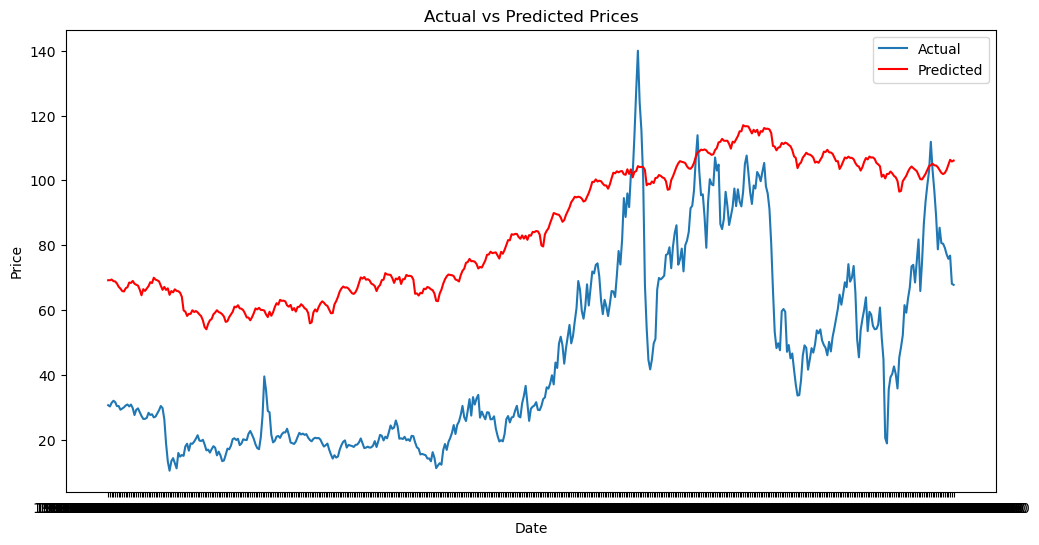

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['price'], label='Actual')
plt.plot(df['date'], forecast['yhat'], color='r', label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/kaggle/input/crude-oil-price/crude-oil-price.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Normalize 'price' using MinMaxScaler
scaler = MinMaxScaler()
df['price_scaled'] = scaler.fit_transform(df[['price']])

# Prepare the data for LSTM
window_size = 10

X = []
y = []
for i in range(len(df) - window_size):
    X.append(df.iloc[i:i+window_size, -1].values)  # Use scaled price values
    y.append(df.iloc[i+window_size, -1])
X = np.array(X)
y = np.array(y)

# Split the data into train and test sets
train_size = int(0.8 * len(X))
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# Define the LSTM model
def create_model(neurons=50, optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define hyperparameters to tune
param_dist = {
    'neurons': [50, 100, 150, 200],
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.0, 0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64, 128],
    'epochs': [10, 20, 30]
}

# Perform random search
random = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='neg_mean_squared_error', n_iter=10)
random_result = random.fit(train_X.reshape(-1, window_size, 1), train_y)

# Get the best model
best_model = random_result.best_estimator_
best_params = random_result.best_params_
print("Best Model Parameters:")
print(best_params)

# Predictions on test set and MSE calculation
test_y_pred = random_result.predict(test_X.reshape(-1, window_size, 1))
print('Test MSE:', mean_squared_error(test_y, test_y_pred))

Best Model Parameters:
{'optimizer': 'adam', 'neurons': 200, 'epochs': 30, 'dropout_rate': 0.1, 'batch_size': 32}
Test MSE: 0.005448256712895253


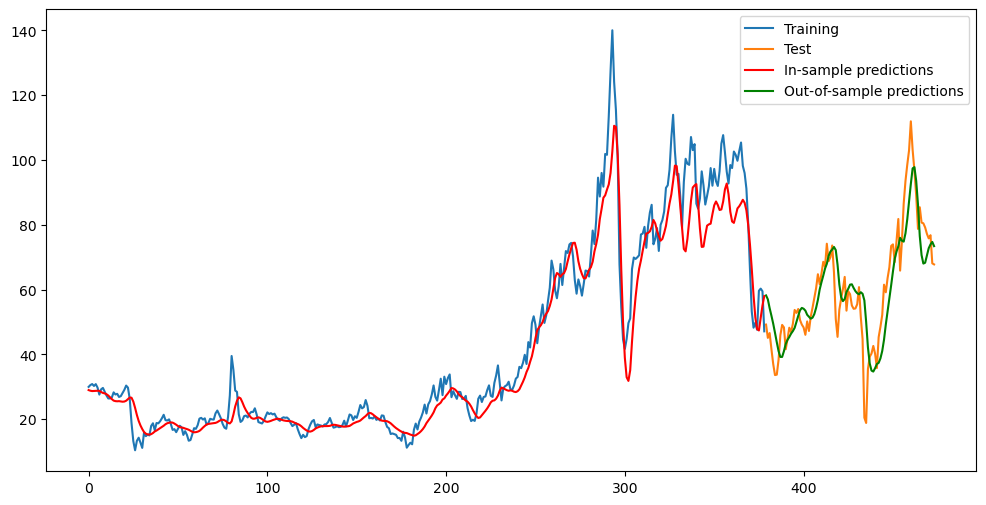

In [43]:
# Get in-sample predictions
in_sample_preds = best_model.predict(train_X.reshape(-1, window_size, 1))

# Get out-of-sample predictions
out_of_sample_preds = best_model.predict(test_X.reshape(-1, window_size, 1))

# Transform predictions back to original scale
in_sample_preds = scaler.inverse_transform(in_sample_preds.reshape(-1, 1))
out_of_sample_preds = scaler.inverse_transform(out_of_sample_preds.reshape(-1, 1))

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(train_y)), scaler.inverse_transform(train_y.reshape(-1, 1)), label='Training')
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), scaler.inverse_transform(test_y.reshape(-1, 1)), label='Test')
plt.plot(np.arange(len(train_y)), in_sample_preds, label='In-sample predictions', color='r')
plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), out_of_sample_preds, label='Out-of-sample predictions', color='g')
plt.legend()
plt.show()